# Data Hacks 2022 - Alex, Prabina, & Atharva

## Final Report - Advanced Level

##### Read in Files, Import

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud  import WordCloud


In [10]:
data = pd.read_csv('data/trainset.csv')
data.head()

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


### Intro

### Data Cleaning

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus  import stopwords
import re

In [12]:
def cleaning(df):
    lowered=df.lower() # lowering the sentences 
    removed = re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space 
    splitted=removed.split(' ')   # splitting the sentences by spaces to lemmatize
    df = [WordNetLemmatizer().lemmatize(word) for word in splitted 
        if word not in stopwords.words('english')]  # lemmatizing and removing stopwords
    df =' '.join(df) # joining back the words of list
    return(removed)

In [13]:
data['Sentence'] = data['Sentence'].apply(cleaning)
data.head()

,Sentence,Sentiment
0,according to the finnish russian chamber of co...,neutral
1,the swedish buyout firm has sold its remaining...,neutral
2,spy wouldn t be surprised to see a green close,positive
3,shell s billion bg deal meets shareholder ...,negative
4,ssh communications security corp stock exchang...,negative


### Visualizations

##### See what proportion of responses are negative, positive, and neutral.

Text(0.5, 1.0, 'Proportion for each Sentiment')

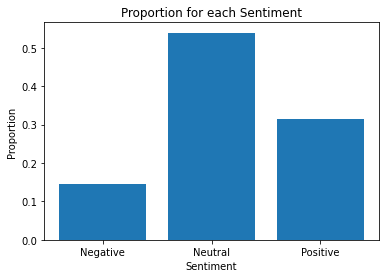

In [14]:
proportion_neg = data.loc[data['Sentiment'] == 'negative'].shape[0] / data.shape[0]
proportion_neutral = data.loc[data['Sentiment'] == 'neutral'].shape[0] / data.shape[0]
proportion_positive = data.loc[data['Sentiment'] == 'positive'].shape[0] / data.shape[0]
props = [proportion_neg, proportion_neutral, proportion_positive]

plt.bar(['Negative', 'Neutral', 'Positive'], props)
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Proportion for each Sentiment') 

##### **Clearly there is an imbalance towards 'Neutral' Sentinement, with it consisting of more than 50% of the total training data set.** 

##### This is potentially due to the fact that if a model is not sure about how to rate a sentence, it rates it neutral. 

### Query data by whether sentence is alpha-numeric, PRABINA TODO

### Query data by length of sentence

##### We wondered if the length of the sentence has anything to do with how a sentence is rated as negative, neutral, or positive.

In [15]:
def sentence_len(col):
    return len(col)
data['len_of_sentence'] = data['Sentence'].apply(sentence_len)
data

,Sentence,Sentiment,len_of_sentence
0,according to the finnish russian chamber of co...,neutral,128
1,the swedish buyout firm has sold its remaining...,neutral,135
2,spy wouldn t be surprised to see a green close,positive,47
3,shell s billion bg deal meets shareholder ...,negative,56
4,ssh communications security corp stock exchang...,negative,190
...,...,...,...
4377,investments in product development stood at ...,neutral,72
4378,hsbc says unit to book million charge on ...,negative,56
4379,rising costs have forced packaging producer hu...,negative,107
4380,in the building and home improvement trade s...,neutral,88


In [16]:
data['len_of_sentence'].median()

107.0

The *median* length of the 'Sentence' column is 107. Mean was not used as it is susceptible to outliers.

In [18]:
bottom_50 = data.loc[data['len_of_sentence'] <= 107]
# bottom_50

##### Find how many sentences are placed under negative, neutral, and positive for sentences that have length lower than the median (107).

In [19]:
bottom_sentiments = [bottom_50.loc[bottom_50['Sentiment']=='negative'].shape[0] / bottom_50.shape[0], 
bottom_50.loc[bottom_50['Sentiment']=='neutral'].shape[0] / bottom_50.shape[0], 
bottom_50.loc[bottom_50['Sentiment']=='positive'].shape[0] / bottom_50.shape[0]]
bottom_sentiments

[0.16914749661705006, 0.487595850248083, 0.3432566531348669]

In [20]:
top_50 = data.loc[data['len_of_sentence'] > 107]
# top_50

##### Find how many sentences are placed under negative, neutral, and positive for sentences that have length greater than the median (107).

In [21]:
top_sentiments = [top_50.loc[top_50['Sentiment']=='negative'].shape[0] / top_50.shape[0],
top_50.loc[top_50['Sentiment']=='neutral'].shape[0] / top_50.shape[0],
top_50.loc[top_50['Sentiment']=='positive'].shape[0] / top_50.shape[0]]
top_sentiments

[0.12055427251732101, 0.5921478060046189, 0.28729792147806005]

##### Now let's plot both the bottom 50th percentile (from df bottom_50) and the upper 50th percentile (from df top_50) and see if there are any clear deviations from our original graph.

##### Here is the original graph again, for reference.

Text(0.5, 1.0, 'Proportion for each Sentiment')

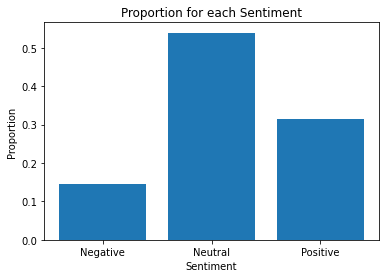

In [22]:
plt.bar(['Negative', 'Neutral', 'Positive'], props)
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Proportion for each Sentiment') 

### Here is the graph for the bottom 50th percentile

Text(0.5, 1.0, 'Proportion for each Sentiment for 0-50th percentile')

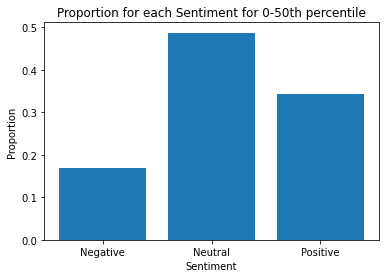

In [23]:
plt.bar(['Negative', 'Neutral', 'Positive'], bottom_sentiments)
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Proportion for each Sentiment for 0-50th percentile') 

### Here is the graph for the top 50th percentile

Text(0.5, 1.0, 'Proportion for each Sentiment for 51-99 percentile')

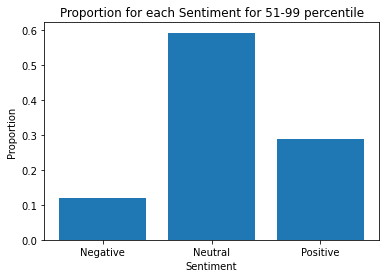

In [24]:
plt.bar(['Negative', 'Neutral', 'Positive'], top_sentiments)
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Proportion for each Sentiment for 51-99 percentile') 

##### It seems that there is no correlation between shorter/longer sentences, and those sentences' ratings.

### Word Cloud

In [26]:
data.head()

,Sentence,Sentiment,len_of_sentence
0,according to the finnish russian chamber of co...,neutral,128
1,the swedish buyout firm has sold its remaining...,neutral,135
2,spy wouldn t be surprised to see a green close,positive,47
3,shell s billion bg deal meets shareholder ...,negative,56
4,ssh communications security corp stock exchang...,negative,190


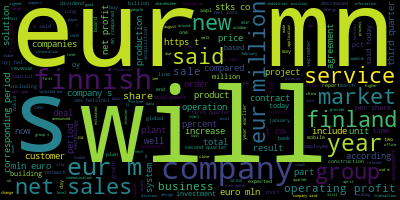

In [28]:
corpus=' '.join(data['Sentence'])
word_cloud = WordCloud().generate(corpus)
image = word_cloud.to_image()
image

This word cloud shows the most frequent words from our train dataset.
It seems like eur, mn, and year are some of the most common words. Considering our dataset included sentences from financial market, eur for europian, mn for million, and year is reasonable.

### Analysis/ Results

After cleaning the data by turning every word to lower case, removing non-aplhabetical words, and removing stop words, and lemmatizing
sort words by grouping inflected or variant forms of the same word.

SVC didnt work
Logistic Regression worked

### Conclusion/ future improvements

In our training dataset, the proportion of sentiments were imbalanced. In the future, we will create a dataset which has equal sentiments 